# A simple linear regression

## **Introduction**


Simple linear regression is a way to model the relationship between two variables. By assessing the direction and magnitude of a relationship, data professionals are able to uncover patterns and transform large amounts of data into valuable knowledge. This enables them to make better predictions and decisions. 

This project focuses on the use of influencer marketing, exploring the relationship between radio promotion budget and your sales. 

The dataset includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, company leaders will make decisions about where to focus future marketing resources. Therefore, it is critical to provide them with a clear understanding of the relationship between types of marketing campaigns and the revenue generated as a result of this investment.

## **Step 1: Install and Imports** 


Import relevant Python libraries and modules.

In [1]:
# Install libraries
#!pip install matplotlib
#!pip install seaborn
#!pip install statsmodels

In [2]:
# Import relevant Python libraries and modules.
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

The dataset is a .csv file (named `marketing_sales_data.csv`), which contains information about marketing conducted in collaboration with influencers, along with corresponding sales. The numerical variables in the data are expressed in millions of dollars. 

**Note:** This is a fictional dataset that was created for educational purposes. 

In [3]:
path = os.getcwd()

In [4]:
csv_filename = r"marketing_sales_data.csv"

In [5]:
fullpath = os.path.join(path, csv_filename)

In [6]:
# import the data
data = pd.read_csv(fullpath)

## **Step 2: Data exploration** 


To get a sense of what the data includes, display the first 10 rows of the data.

In [7]:
# Display the first 10 rows of the data.
data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


**Observations about the different variables included in the data**

The data includes the following information:

- TV promotion budget (expressed as "Low", "Medium", or "High") 
- Radio promotion budget
- Social media promotion budget
- Type of influencer that the promotion is in collaboration with (expressed as "Mega", "Macro", or "Micro", or "Nano")
    - Note: Mega-influencers have over 1 million followers, macro-influencers have 100,000 to 1 million followers, micro-influencers have 10,000 to 100,000 followers, and nano-influencers have fewer than 10,000 followers.
- Sales accrued from the promotion

**Number of rows and the number of columns**

In [8]:
# Display number of rows, number of columns.
data.shape

(572, 5)

There are 572 rows and 5 columns

**Missing values in the rows of the data**

This is important because missing values are not that meaningful when modeling the relationship between two variables. To do so, get Booleans that indicate whether each value in the data is missing. Then, check both columns and rows for missing values.

In [9]:
# Start with .isna() to get booleans indicating whether each value in the data is missing.
data.isna()

,TV,Radio,Social Media,Influencer,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
567,False,False,False,False,False
568,False,False,False,False,False
569,False,False,False,False,False
570,False,False,False,False,False


In [10]:
# Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row.
data.isna().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
567    False
568    False
569    False
570    False
571    False
Length: 572, dtype: bool

In [11]:
# Use .sum() to get the number of rows that contain missing values.
data.isna().any(axis=1).sum()

3

**Rows containing missing values**

There are 3 rows containing missing values, which is not that many, considering the total number of rows. It would be appropriate to drop these rows that contain missing values to proceed with preparing the data for modeling.

Next, drop the rows that contain missing values. Data cleaning makes your data more usable for analysis and regression. Then, check to make sure that the resulting data does not contain any rows with missing values.

In [12]:
# Use .dropna(axis=0) to indicate that you want rows which contain missing values to be dropped. To update the DataFrame, reassign it to the result.
data = data.dropna(axis=0)
data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


In [13]:
# Start with .isna() to get booleans indicating whether each value in the data is missing.
# Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row.
# Use .sum() to get the number of rows that contain missing values
data.isna().any(axis=1).sum()

0

**Checking model assumptions**

To explore the relationship between radio promotion budget and sales, model the relationship using linear regression. Begin by confirming whether the model assumptions for linear regression can be made in this context. 

**Note:** Some of the assumptions can be addressed before the model is built. These will be addressed in this section. After the model is built, you will finish checking the assumptions.

Create a plot of pairwise relationships in the data, and visualize the relationships and check model assumptions. 

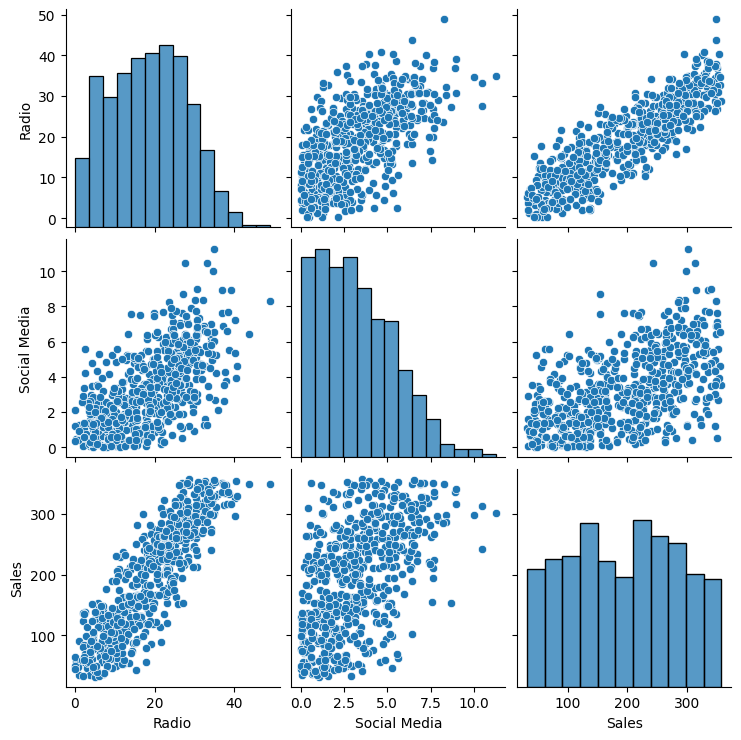

In [16]:
# Create plot of pairwise relationships.
sns.pairplot(data)
plt.show()

**The assumption of linearity**

In the scatter plot of `Sales` over `Radio`, the points appear to cluster around a line that indicates a positive association between the two variables. Since the points cluster around a line, it seems the assumption of linearity is met.

## **Step 3: Model building** 

Select only the columns that are needed for the model.

In [17]:
# Select relevant columns.
# Save resulting DataFrame in a separate variable to prepare for regression.
ols_data = data[["Radio", "Sales"]]

Now, display the first 10 rows of the new DataFrame to better understand the data.

In [18]:
# Display first 10 rows of the new DataFrame.
ols_data.head(10)

,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774790
3,26.469274,328.239378
4,36.876302,351.807328
5,25.561910,261.966812
6,37.263819,349.861575
7,13.187256,140.415286
8,29.520170,264.592233
9,3.773287,55.674214


Next, write the linear regression formula for modeling the relationship between the two variables of interest.

In [23]:
# Write the linear regression formula.
# Save it in a variable.
ols_formula = "Sales ~ Radio"

Now, implement the _ordinary least squares_ (OLS) approach for linear regression.

In [24]:
# Implement OLS.
OLS = ols(formula = ols_formula, data = ols_data)

Now, create a linear regression model for the data and fit the model to the data.

In [25]:
# Fit the model to the data.
# Save the fitted model in a variable.
model = OLS.fit()

## **Step 4: Results and evaluation** 


Begin by getting a summary of the results from the model.

In [39]:
# Get summary of results.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Fri, 20 Jun 2025   Prob (F-statistic):          2.07e-176
Time:                        21:40:08   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Next, analyze the bottom table from the results summary. Based on the table, identify the coefficients that the model determined would generate the line of best fit. The coefficients are the y-intercept and the slope. 

**The y-intercept** is 41.5326

**The slope** is 8.1733

**The linear equation** that express the relationship between sales and radio promotion budget.

y = slope * x + y-intercept


sales = 8.1733 * radio promotion budget + 41.5326

**The slope mean** in this context:

- One interpretation: If a company has a budget of 1 million dollars more for promoting their products/services on the radio, the company's sales would increase by 8.1733 million dollars on average.
- Another interpretation: Companies with 1 million dollars more in their radio promotion budget accrue 8.1733 million dollars more in sales on average.

**Checking the model assumptions** Confirm findings. First, plot the OLS data with the best fit regression line.

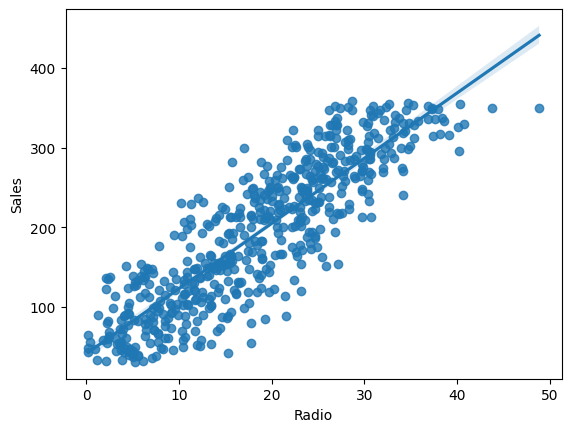

In [27]:
# Plot the OLS data with the best fit regression line.
sns.regplot(x = "Radio", y = "Sales", data = ols_data)
plt.show()

**Observations from the preceding regression plot**

This plot shows the relationship between `Sales` (x-axis) and `Radio` (y-axis). There is a possitive linear relationship, as the radio budget increases, sales tend to increase as well. The data points are somewhat spread around the regression line, indicating a moderate correlation. There are points laying far from the line, possibly indicating outliers or variability in Sales. For every additional dollar spend on radio promotion, sales are expected to increase by **8.17** dollars. The baseline sales are expected to be **41.53** dollars. The **75.75%** of the variation in sales is explained by the radio promotion budget.

**The normality assumption** The residuals from the model.

In [29]:
# Get the residuals from the model.
residuals = model.resid

Now, visualize the distribution of the residuals.

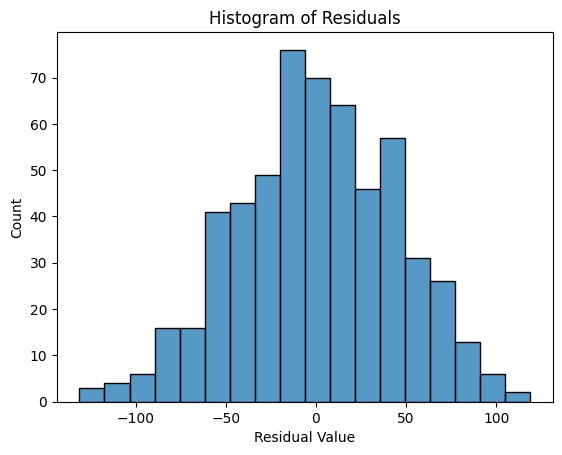

In [31]:
# Visualize the distribution of the residuals.
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

**Observations about the distribution of the residuals**

The shape is centered, with most `Residual Value` around zero. The center of the distribution lies between -15 and 15, where the frequency of residual values is highest.

Next, create a Q-Q plot to confirm the assumption of normality.

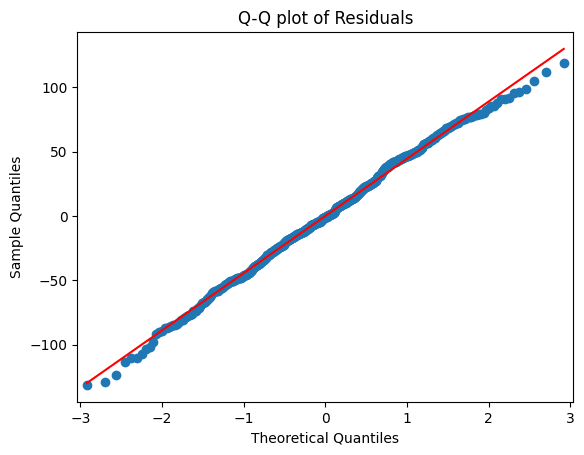

In [32]:
# Create a Q-Q plot.
sm.qqplot(residuals, line='s')
plt.title("Q-Q plot of Residuals")
plt.show()

**The assumption of normality**

The points closely follow a straight diagonal line trending upward, which suggests that data is approximately normally distributed and the normality assumption is met. There are some extreme low values that fall below the line. These data points could be natural variations, or rare events. There is also extreme high values that fall below the line, indicating heavier tails or outliers. Overall, the data shows mild deviations at the tais but futs the normal distribution well in the center.

Now, check the assumptions of independent observation and homoscedasticity. Start by getting the fitted values from the model.

In [40]:
# Get fitted values.
fitted_values = model.predict(ols_data["Radio"])

Next, create a scatterplot of the residuals against the fitted values.

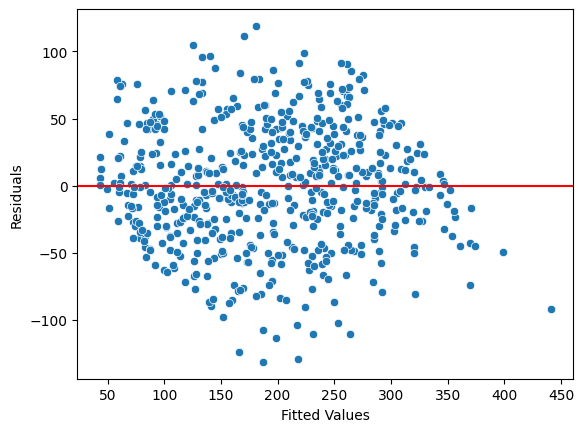

In [41]:
# Create a scatterplot of residuals against fitted values.
fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0, color="red")
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()

**Assumptions of independent observation and homoscedasticity**

The data points have a cloud-like resemblance and do not follow an explicit pattern. So it appears that the independent observation assumption has not been violated. Given that the residuals appear to be randomly spaced, the homoscedasticity assumption seems to be met.


## **Considerations**

Data visualizations and exploratory data analysis can be used to check if linear regression is a well suited approach for modeling the relationship between two variables.

The results of a linear regression model can be used to express the relationship between two variables. 

**Findings**


In the simple linear regression model, the y-intercept is **41.5326** and the slope is **8.1733**. 
- One interpretation: If a company has a budget of **1 million** dollars more for promoting their products/services on the radio, the company's sales would increase by **8.1733 million** dollars on average.
- Another interpretation: Companies with **1 million** dollars more in their radio promotion budget accrue **8.1733** million dollars more in sales on average.

The results are statistically significant with a p-value of **zero**, which is a very small value (and smaller than the common significance level of **0.05**). This indicates that there is a very low probability of observing data as extreme or more extreme than this dataset when the null hypothesis is true. 

In this context, 
- The null hypothesis is that there is no relationship between radio promotion budget and sales i.e. the slope is zero, and
- The alternative hypothesis is that there is a relationship between radio promotion budget and sales i.e. the slope is not zero.

So, you could reject the null hypothesis and state that there is a relationship between radio promotion budget and sales for companies in this data.

The slope of the line of best fit that resulted from the regression model is approximate and subject to uncertainty (not the exact value). The **95%** confidence interval for the slope is **from 7.791 to 8.555**. This indicates that there is a **95%** probability that the interval **[7.791, 8.555]** contains the true value for the slope.

**Summary Report to stakeholders**

Based on the dataset at hand and the regression analysis conducted here, there is a notable relationship between radio promotion budget and sales for companies in this data, with a p-value of **zero** and standard error of **0.194**. For companies represented by this data, a **1 million** dollar increase in radio promotion budget could be associated with a **8.1733 million** dollar increase in sales. It would be worth continuing to promote products/services on the radio. Also, it is recommended to consider further examining the relationship between the two variables (radio promotion budget and sales) in different contexts. For example, it would help to gather more data to understand whether this relationship is different in certain industries or when promoting certain types of products/services. 

**References**

[Pandas.DataFrame.Any — Pandas 1.4.3 Documentation.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html)

[Pandas.DataFrame.Isna — Pandas 1.4.3 Documentation.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html)

[Pandas.Series.Sum — Pandas 1.4.3 Documentation.](https://pandas.pydata.org/docs/reference/api/pandas.Series.sum.html)

[Saragih, H.S. *Dummy Marketing and Sales Data*.](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)